In [3]:
#Multivariate using stat model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets


In [4]:
data=datasets.load_boston()
target=pd.DataFrame(data.target,columns=["MEDV"])
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()
# target.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


MSE= 27.459844835891833


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              846.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):                   2.38e-320
Time:                        16:18:46   Log-Likelihood:                         -1556.1
No. Observations:                 506   AIC:                                      3136.
Df Residuals:                     494   BIC:                                      3187.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1439      0.036     -3.990      0.000      -0.215      -0.073
ZN             0.0413      0.015      2.696      0.007       0.011       0.071
INDUS         -0.0370      0.068     -0.540      0.589      -0.172       0.098
CHAS           3.2525      0.961      3.384      0.001       1.364       5.141
NOX          -10.8653      3.422     -3.175      0.002     -17.590      -4.141
RM             7.1436      0.289     24.734      0.000       6.576       7.711
AGE           -0.0449      0.014     -3.235      0.001      -0.072      -0.018
DIS           -1.2292      0.206     -5.980      0.000      -1.633      -0.825
RAD            0.2008      0.071      2.829      0.005       0.061       0.340
TAX           -0.0100      0.004     -2.391      0.017      -0.018      -0.002
PTRATIO       -0.6575      0.112     -5.881      0.000      -0.877      -0.438
B              0.0165      0.003      5.779      0.000       0.011       0.022
==============================================================================
Omnibus:                      277.013   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3084.310
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

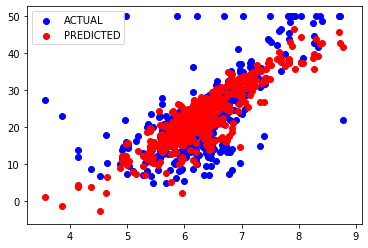

In [8]:
x=df.iloc[:,:-1]
y=target["MEDV"]
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

residual=predictions-y
# plt.scatter(x,residual)
plt.scatter(x["RM"],y,color="blue",label="ACTUAL")
plt.scatter(x["RM"],predictions,color="red",label="PREDICTED")
# plt.scatter(x["RM"],(predictions-y),color="red")
plt.legend()
print("MSE=",((predictions-y)**2).mean())
model.summary()

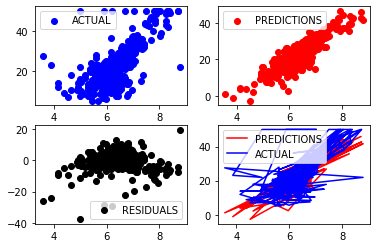

In [6]:
#PLOTTING
plt.subplot(2,2,1)
plt.scatter(df["RM"],y,color="blue",label="ACTUAL")
plt.legend()
plt.subplot(2,2,2)
plt.scatter(df["RM"],predictions,color="red",label="PREDICTIONS")
plt.legend()
plt.subplot(2,2,3)
plt.scatter(df["RM"],predictions-y,color="black",label="RESIDUALS")
plt.legend()
plt.subplot(2,2,4)
plt.plot(df["RM"],predictions,color="red",label="PREDICTIONS")
plt.plot(df["RM"],y,color="blue",label="ACTUAL")
plt.legend()

Text(0, 0.5, 'RESIDUALS')

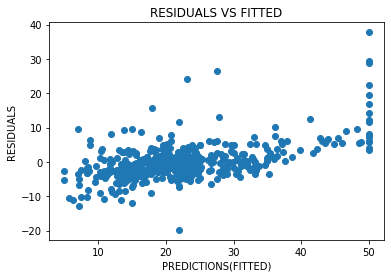

In [7]:
#No pattern in Residuals vs Fitted, So Non Linearity is not there
plt.scatter(y,(y-predictions))
plt.title("RESIDUALS VS FITTED")
plt.xlabel("PREDICTIONS(FITTED)")
plt.ylabel("RESIDUALS")